# Tasks:
1. Import a 311 NYC service request.
2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
5. Perform a statistical test for the data.

**Task 1**

In [159]:
# importing required libraries
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
#importing the dataset
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

In [161]:
# exploring the data:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [162]:
dataset.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [163]:
dataset['Bridge Highway Name'].describe()

count        243
unique        29
top       FDR Dr
freq          33
Name: Bridge Highway Name, dtype: object

In [164]:
dataset['Bridge Highway Name'].unique()

array([nan, 'BQE/Gowanus Expwy', 'Grand Central Pkwy',
       'Cross Bronx Expwy', 'Park Ave Tunnel - E 34th St./Grand Central',
       'Long Island Expwy', 'FDR Dr', 'Prospect Expwy',
       'Jackie Robinson/Interboro Pkwy', 'Staten Island Expwy',
       'Hutchinson River Pkwy', 'Belt Pkwy',
       'First Ave Tunnel - UN Plaza', 'Van Wyck Expwy', 'West Street',
       'FDR Southbound', 'Battery Park Underpass', 'Harlem River Dr',
       'Bronx River Pkwy', 'Richmond Pkwy/Korean War Vets',
       'Nassau Expwy', 'Henry Hudson Pkwy/Rt 9A',
       'Third Ave Br - Fifth St Basin', 'Major Deegan Expwy',
       'Sheridan Expwy', 'Whitestone Expwy', 'Cross Island Pkwy',
       'Bruckner Expwy', 'Third Ave Br - E 129th St', 'Clearview Expwy'],
      dtype=object)

In [165]:
dataset['Bridge Highway Direction'].describe()

count                   243
unique                   34
top       East/Queens Bound
freq                     21
Name: Bridge Highway Direction, dtype: object

In [166]:
dataset['Bridge Highway Direction'].uniqueue()

AttributeError: 'Series' object has no attribute 'uniqueue'

In [ ]:
dataset['Road Ramp'].describe()

In [ ]:
dataset['Road Ramp'].unique()

In [ ]:
dataset['Bridge Highway Segment'].describe()

In [ ]:
dataset['Bridge Highway Segment'].unique()

**Task 2**

In [167]:
print( type( dataset['Created Date'].values[0] ) )
print( dataset['Created Date'].values[0] )
print( dataset['Created Date'].values[0][-2:] )

<class 'str'>
12/31/2015 11:59:45 PM
PM


In [168]:
print( type( dataset['Closed Date'].values[0] ) )
print( dataset['Closed Date'].values[0] )

<class 'str'>
01-01-16 0:55


In [169]:
def convertTime( time:str ):
    try:
        date = time.split()[0]
        timeI = time.split()[1]
        m = date[:2]
        d = date[3:5]
        y = int( date[6:] ) 
        if( y < 100 ):
            y += 2000
        y = str( y )
        h = int(timeI.split(':')[0])
        mi = timeI.split(':')[1]
        if time[-2:] == 'PM' : 
            if h != 12:
                h += 12
        elif time[-2:] == 'AM':
            if h == 12:
                h -= 12
        h = str( h )
        processedTime = m + '/' + d + '/' + y + ' ' + h + ':' + mi
        return datetime.strptime( processedTime, '%m/%d/%Y %H:%M' )
    except:
        pass

print( type( convertTime( dataset['Created Date'].values[0] ) ) )
print( convertTime( dataset['Created Date'].values[0] )  )

<class 'datetime.datetime'>
2015-12-31 23:59:00


In [170]:
dataset['Created Date'] = dataset['Created Date'].apply(convertTime)

In [171]:
dataset['Closed Date'] = dataset['Closed Date'].apply(convertTime)

In [172]:
dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:00,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:00,2015-03-29 02:33:00,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:00,2015-03-29 03:40:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:00,2015-03-29 04:38:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [173]:
type( dataset['Closed Date'].values[0] )

numpy.datetime64

In [174]:
type( dataset['Created Date'].values[0] )

numpy.datetime64

In [175]:
dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']

In [176]:
dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:00,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:00,2015-03-29 02:33:00,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:00
300695,30283424,2015-03-29 00:33:00,2015-03-29 03:40:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:00
300696,30280004,2015-03-29 00:33:00,2015-03-29 04:38:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:00


In [177]:
type( dataset['Request_Closing_Time'].values[0] )

numpy.timedelta64

In [178]:
#checking if there are NaN values, if are then how many
len( dataset['Request_Closing_Time'] ) - len( dataset['Request_Closing_Time'].dropna() )

2164

In [179]:
True in ( dataset['Request_Closing_Time'].dropna().values < np.timedelta64(0) )

False

**Task 3**

In [180]:
dataset.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude,Request_Closing_Time
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000,298534
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630,0 days 04:18:51.817615413
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454,0 days 06:05:22.155510708
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,0 days 00:01:00
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142,0 days 01:17:00
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781,0 days 02:43:00
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805,0 days 05:21:00
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760,24 days 16:53:00


In [181]:
dataset.groupby('Incident Zip').describe()

Unique Key                                                        \
                  count          mean            std         min          25%   
Incident Zip                                                                    
83.0               97.0  3.116638e+07  576506.329216  30286247.0  30731026.00   
10000.0            73.0  3.119614e+07  492122.131205  30408593.0  30732223.00   
10001.0          1320.0  3.134178e+07  554697.006057  30284764.0  30919421.50   
10002.0          2878.0  3.131604e+07  588099.130188  30279673.0  30787937.50   
10003.0          2689.0  3.130493e+07  605214.629523  30281419.0  30732163.00   
...                 ...           ...            ...         ...          ...   
11692.0           220.0  3.130147e+07  525623.995255  30334814.0  30905966.25   
11693.0           388.0  3.119834e+07  484568.779587  30287427.0  30780778.50   
11694.0           745.0  3.123046e+07  475750.063446  30286736.0  30894522.00   
11695.0             3.0  3.102050e+07  115144.553820  30890720.0  30975536.50   
11697.0            30.0  3.115678e+07  454809.059965  30298349.0  31019115.75   

                                                  X Coordinate (State Plane)  \
                     50%          75%         max                      count   
Incident Zip                                                                   
83.0          31061679.0  31564265.00  32194211.0                       97.0   
10000.0       31154454.0  31532046.00  32178980.0                       73.0   
10001.0       31364240.0  31780489.75  32310451.0                     1304.0   
10002.0       31365321.5  31831248.00  32310019.0                     2849.0   
10003.0       31327344.0  31847613.00  32306172.0                     2688.0   
...                  ...          ...         ...                        ...   
11692.0       31233601.5  31653466.75  32280961.0                      220.0   
11693.0       31165428.0  31530470.75  32297198.0                      388.0   
11694.0       31191211.0  31515401.00  32308476.0                      743.0   
11695.0       31060353.0  31085386.00  31110419.0                        3.0   
11697.0       31113618.0  31485782.00  32181257.0                       30.0   

                            ...  Longitude            Request_Closing_Time  \
                      mean  ...        75%        max                count   
Incident Zip                ...                                              
83.0          9.924912e+05  ... -73.971301 -73.949404                   97   
10000.0       9.939029e+05  ... -73.965126 -73.965126                   73   
10001.0       9.858223e+05  ... -73.988383 -73.984235                 1320   
10002.0       9.872546e+05  ... -73.986944 -73.971443                 2876   
10003.0       9.872629e+05  ... -73.987147 -73.980118                 2689   
...                    ...  ...        ...        ...                  ...   
11692.0       1.041271e+06  ... -73.789063 -73.784453                  220   
11693.0       1.035597e+06  ... -73.812451 -73.804200                  388   
11694.0       1.029785e+06  ... -73.824072 -73.818550                  745   
11695.0       1.013267e+06  ... -73.892197 -73.882089                    3   
11697.0       1.013091e+06  ... -73.887049 -73.882756                   30   

                                                                    \
                                   mean                        std   
Incident Zip                                                         
83.0          0 days 03:17:39.587628865  0 days 03:06:56.897587784   
10000.0       0 days 03:09:41.917808219  0 days 03:00:00.044837552   
10001.0       0 days 02:08:23.272727272  0 days 02:42:13.704068413   
10002.0       0 days 02:24:20.340751043  0 days 02:43:58.638577895   
10003.0       0 days 03:05:21.331349944  0 days 03:56:35.584926707   
...                                 ...                        ...   
11692.0       0 days 02:15:54.2727

(array([10219., 17352., 17893., 18676., 17585., 15629., 15531., 14260.,
        12529., 12056., 10825.,  9527.,  9216.,  8624.,  7793.,  6801.,
         6554.,  5844.,  5555.,  5321.,  4619.,  4526.,  4158.,  3689.,
         3690.,  3426.,  3134.,  2785.,  2611.,  2443.,  2094.,  1985.,
         1758.,  1776.,  1572.,  1376.,  1369.,  1248.,  1096.,  1049.,
         1007.,   847.,   863.,   792.,   657.,   760.,   701.,   607.,
          616.,   591.,   533.,   474.,   522.,   459.,   404.,   442.,
          467.,   415.,   381.,   364.]),
 array([   0.        ,   16.66666667,   33.33333333,   50.        ,
          66.66666667,   83.33333333,  100.        ,  116.66666667,
         133.33333333,  150.        ,  166.66666667,  183.33333333,
         200.        ,  216.66666667,  233.33333333,  250.        ,
         266.66666667,  283.33333333,  300.        ,  316.66666667,
         333.33333333,  350.        ,  366.66666667,  383.33333333,
         400.        ,  416.66666667,  433.333

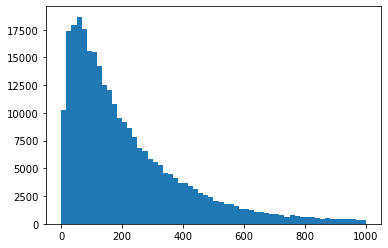

In [189]:
plt.hist( dataset['Request_Closing_Time'].values / np.timedelta64( 1, 'm'), bins = 60, range = (0, 1000) )

In [183]:
max(dataset['Request_Closing_Time'].values / np.timedelta64( 1, 'h'))

592.8833333333333

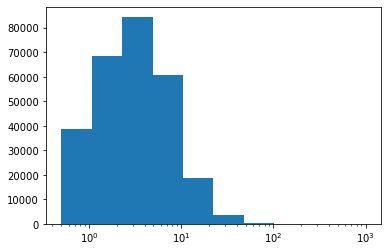

In [197]:
x = dataset['Request_Closing_Time'].values / np.timedelta64( 1, 'h')
#hist, bins, _ = plt.hist( x, bins = 10, range = (0.5, 1000) )

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
#plt.show()

In [190]:
bins

array([5.00000e-01, 1.00045e+03, 2.00040e+03, 3.00035e+03, 4.00030e+03,
       5.00025e+03, 6.00020e+03, 7.00015e+03, 8.00010e+03, 9.00005e+03,
       1.00000e+04])

In [198]:
dataset['Request_Closing_Time'].mode()

0   0 days 00:36:00
dtype: timedelta64[ns]

In [199]:
dataset['Request_Closing_Time'].mean()

Timedelta('0 days 04:18:51.817615413')

In [200]:
dataset['Request_Closing_Time'].median()

Timedelta('0 days 02:43:00')

In [201]:
dataset['Request_Closing_Time'].describe()

count                       298534
mean     0 days 04:18:51.817615413
std      0 days 06:05:22.155510708
min                0 days 00:01:00
25%                0 days 01:17:00
50%                0 days 02:43:00
75%                0 days 05:21:00
max               24 days 16:53:00
Name: Request_Closing_Time, dtype: object

In [202]:
a = dataset.groupby('Complaint Type').describe()

In [203]:
typesOfAction = list( dataset.groupby('Complaint Type').groups.keys() )
typesOfAction

['Agency Issues',
 'Animal Abuse',
 'Animal in a Park',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Derelict Vehicle',
 'Disorderly Youth',
 'Drinking',
 'Ferry Complaint',
 'Graffiti',
 'Homeless Encampment',
 'Illegal Fireworks',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Noise - Park',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Panhandling',
 'Posting Advertisement',
 'Squeegee',
 'Traffic',
 'Urinating in Public',
 'Vending']

In [204]:
numberOfIncidents = [ i for i in a[(                  'Unique Key', 'count')]]

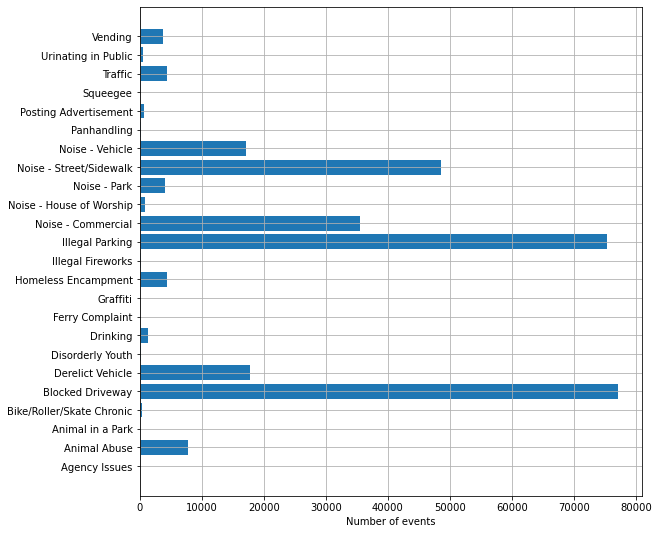

In [205]:
numberOfIncidents = [ i for i in a[(                  'Unique Key', 'count')]]
plt.figure( figsize = ( 9, 9 ) )
plt.barh( typesOfAction, numberOfIncidents )
plt.xlabel('Number of events')
plt.grid()
plt.show()

In [229]:
troublesome = dataset.sort_values('Request_Closing_Time',ascending = False).head(50)

In [230]:
troublesome.groupby('Complaint Type').groups.keys()

dict_keys(['Animal Abuse', 'Animal in a Park', 'Blocked Driveway', 'Derelict Vehicle', 'Illegal Parking', 'Noise - Commercial', 'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Panhandling'])

In [231]:
troublesome.groupby('Complaint Type').count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,2,2,2,2
Animal in a Park,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Blocked Driveway,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,4,4,4,4
Derelict Vehicle,11,11,11,11,11,11,11,11,6,6,...,0,0,0,0,0,0,11,11,11,11
Illegal Parking,13,13,13,13,13,13,13,13,10,10,...,0,0,0,0,0,0,13,13,13,13
Noise - Commercial,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,3,3,3,3
Noise - Street/Sidewalk,14,14,14,14,14,14,14,14,12,12,...,0,0,0,0,0,0,14,14,14,14
Noise - Vehicle,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,1,1
Panhandling,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,1,1,1


In [1]:
print( 'aaa' )

aaa


In [2]:
print( 'aaa' )

aaa


In [3]:
print( 'aaa' )

aaa
